# (Ford-GoBike Share)


## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Time and dates at which riders used to go on a ride, also some members identifications like age and membership status are included as well for each member. To analyze the main factors upon which may or may not affect the duration the individual take during the trip.

In [1]:
#import all the needed libiraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import Perceptron
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file
df = pd.read_csv(r"D:/Fixed Solutions intern/2019-fordgobike-San Franscisco.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#all columns we have
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
#the shape before removing the rows of null values
df.shape

(183412, 16)

In [6]:
#the percentage of missing values
missing_data_count= df.isnull().sum().sum()
all_data_count = np.product(df.shape)
(missing_data_count/all_data_count)*100

0.590133142869605

In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#remove the null values
df.dropna(how='any', axis=0, inplace=True)

In [9]:
#make sure that all the null values have been removed
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
#the shape after removing the rows of null values
df.shape

(174952, 16)

**After Some exploration to the data we going to remove the unwanted columns**

In [11]:
#calculate the member age using birth year
df['age'] = 2022 - df['member_birth_year']

In [12]:
bins= [0,13,19,39,59,200]
labels = ['Kid','Teen','Adult','Middle Age Adult','Senior Adult']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [13]:
#the start and end days
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_day'] = df['start_time'].dt.day_name()
df['end_time'] = pd.to_datetime(df['end_time'])
df['end_day'] = df['end_time'].dt.day_name()

In [14]:
#calculate the duration
df['duration'] = df['end_time'] - df['start_time']

In [15]:
#drop all the unwanted columns
df.drop(['duration_sec', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude'],axis=1,inplace=True)

In [16]:
df.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_group,start_day,end_day,duration
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,38.0,Adult,Thursday,Friday,0 days 14:29:45.830000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,50.0,Middle Age Adult,Thursday,Friday,0 days 17:10:54.928000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,33.0,Adult,Thursday,Friday,0 days 10:08:10.832000
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,48.0,Middle Age Adult,Thursday,Friday,0 days 00:26:25.525000
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,63.0,Senior Adult,Thursday,Friday,0 days 00:29:53.128000


<AxesSubplot:xlabel='member_gender'>

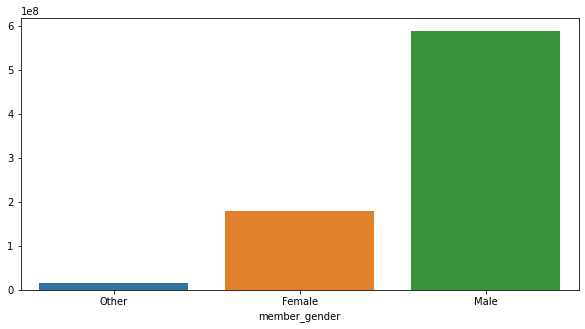

In [17]:
plt.figure(figsize= (10,5))
nat_groups = df.groupby('member_gender')['bike_id'].sum().sort_values()[-10:]
nat_groups
sns.barplot(x=nat_groups.index,y= nat_groups.values)

<AxesSubplot:xlabel='age_group'>

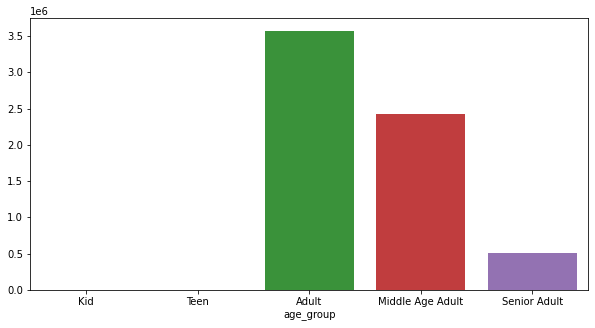

In [18]:
plt.figure(figsize= (10,5))
nat_groups = df.groupby('age_group')['age'].sum().sort_values()[-10:]
nat_groups
sns.barplot(x=nat_groups.index,y= nat_groups.values)

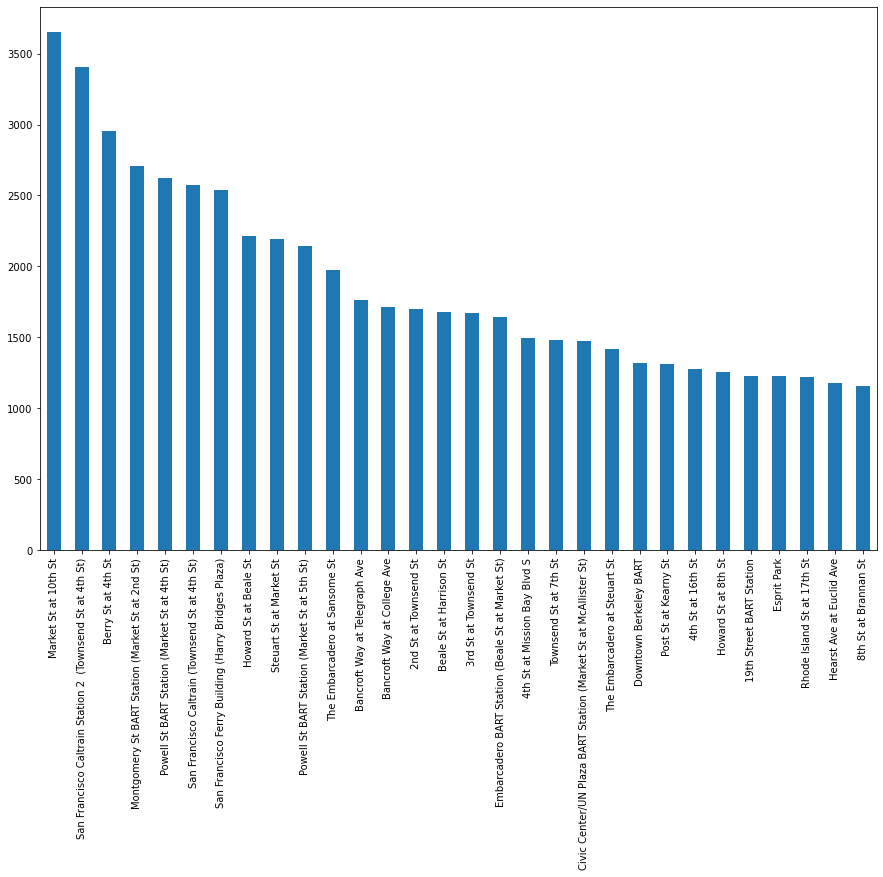

In [19]:
plt.figure(figsize=(15,10))
df['start_station_name'].value_counts()[:30].plot(kind='bar');

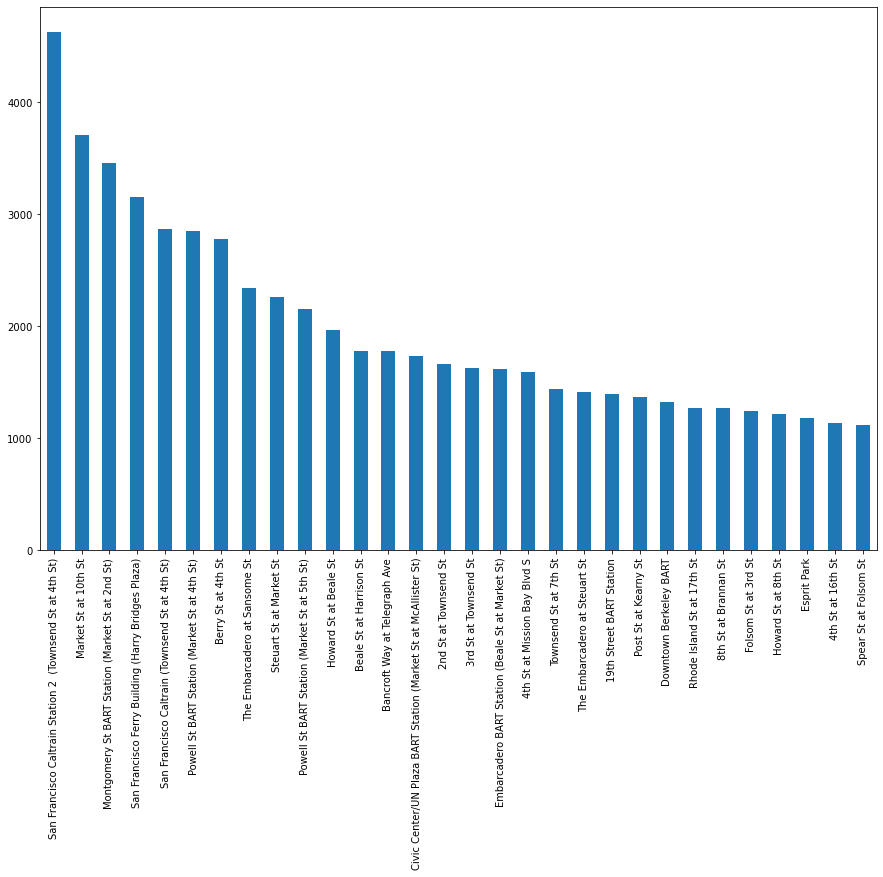

In [20]:
plt.figure(figsize=(15,10))
df['end_station_name'].value_counts()[:30].plot(kind='bar');

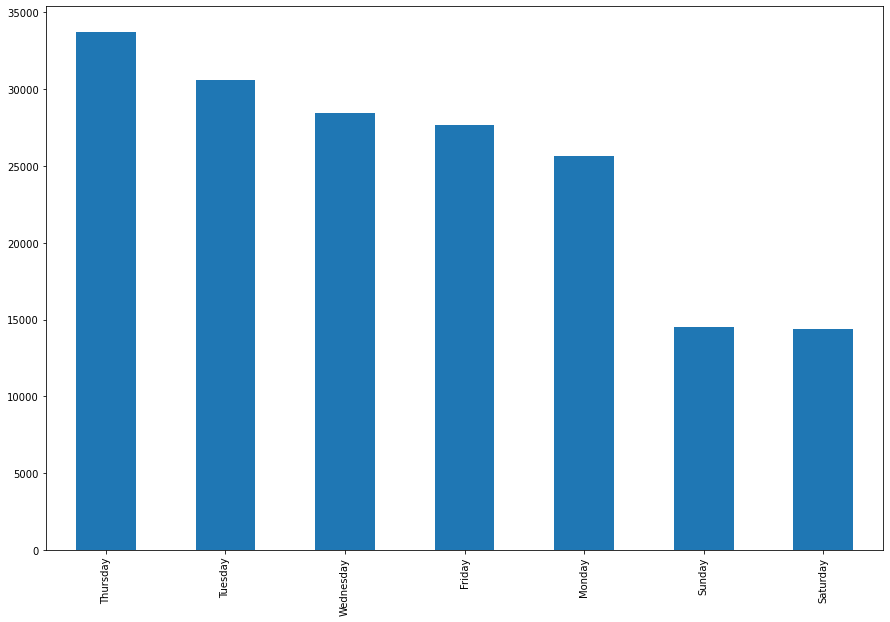

In [21]:
plt.figure(figsize=(15,10))
df['start_day'].value_counts()[:7].plot(kind='bar');

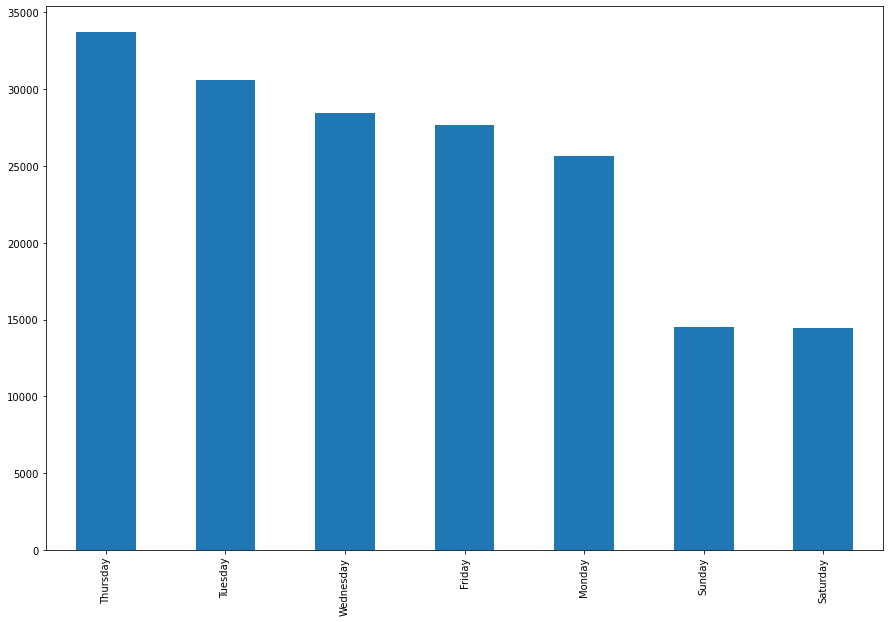

In [22]:

plt.figure(figsize=(15,10))
df['end_day'].value_counts()[:7].plot(kind='bar');

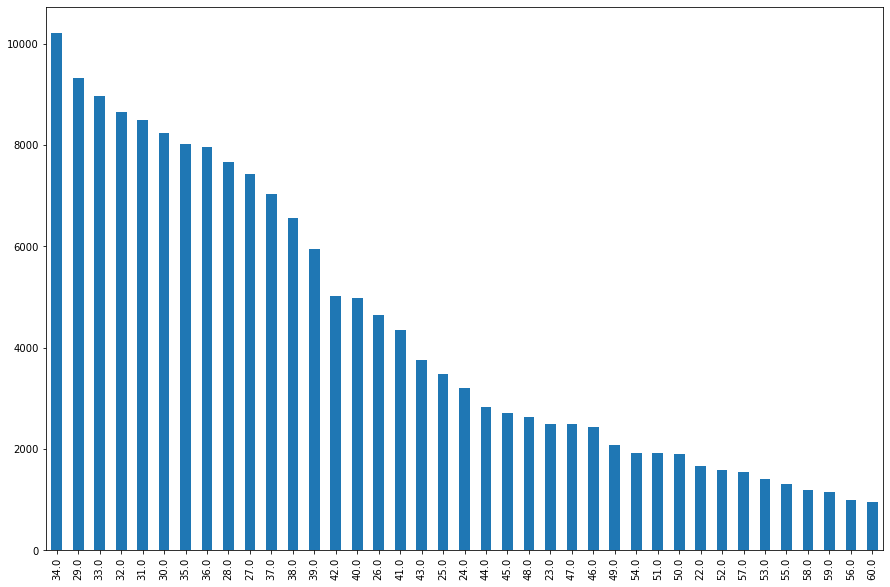

In [23]:
#60 values of age
plt.figure(figsize=(15,10))
df['age'].value_counts()[:60].plot(kind='bar');

In [24]:
#showing the number of attributes
df.user_type.value_counts(ascending = True)

Customer       16566
Subscriber    158386
Name: user_type, dtype: int64

In [25]:
#showing the number of attributes
df.age_group.value_counts(ascending = True)

Kid                      0
Teen                     0
Senior Adult          7887
Middle Age Adult     53041
Adult               114024
Name: age_group, dtype: int64

In [26]:
#convert strings to values 
a = {'Customer': 0, 'Subscriber': 1}
df['user_type'] = df['user_type'].map(a)
b = {'Male': 0, 'Female': 1, 'Other':2}
df['member_gender'] = df['member_gender'].map(b)
c = {'No': 0, 'Yes': 1}
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].map(c)
d = {'Kid': 0, 'Teen': 1, 'Adult':2, 'Middle Age Adult':3, 'Senior Adult':4}
df['age_group'] = df['age_group'].map(d)

In [27]:
#check if there are null values
df.isnull().sum()

start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
age                        0
age_group                  0
start_day                  0
end_day                    0
duration                   0
dtype: int64

In [28]:
features = ['bike_id', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age', 'age_group']

X = df[features]
y = df['user_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train))*100)
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred)*100)

Train data accuracy: 95.79922874083559
Test data accuracy: 83.98189217613974


In [29]:
features = ['bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age']

X = df[features]
y = df['age_group']

x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=1,random_state=0)

ppn = Perceptron(eta0=1.0, fit_intercept=True, max_iter=1000, n_iter_no_change=3, random_state=0)

ppn.fit(x_train, y_train)

y_predict= ppn.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_predict)*100)

Accuracy: 94.8385842974073


In [30]:
features = ['bike_id', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age', 'age_group']

X = df[features]
y = df['user_type']

x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=1,random_state=0)

ppn = Perceptron(eta0=1.0, fit_intercept=True, max_iter=1000, n_iter_no_change=3, random_state=0)

ppn.fit(x_train, y_train)

y_predict= ppn.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_predict)*100)

Accuracy: 90.51968539942385


In [31]:
features = ['bike_id', 'member_gender', 'bike_share_for_all_trip', 'age', 'age_group']

X = df[features]
y = df['user_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

oob_model = BaggingClassifier(n_estimators = 21,n_jobs=-1, oob_score = True,random_state = 50)

oob_model.fit(X_train, y_train)

predicted = oob_model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, predicted)*100)

C:\Users\amr01\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\amr01\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


Accuracy: 93.75828798756231


### What is the structure of your dataset?



### What is/are the main feature(s) of interest in your dataset?




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?



## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?




### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?




## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


### Were there any interesting or surprising interactions between features?

